![Example image](https://upload.wikimedia.org/wikipedia/commons/0/02/Northeastern_Wordmark.svg)
# ALY6015 : Intermediate Analytics

# Clickstream Eshopping : Final Project Analysis 

## Team Members:

### Prince Bansal

### Deepali Jhanji

### Lokhapriya Rathnakumar

### Preetham Gowda Hanumanthapura Ramakrishna 




In [101]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve,classification_report

df_eshop = pd.read_csv('~/Downloads/e-shopping.csv', delimiter=';')
df_eshop.head()

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
0,2008,4,1,1,29,1,1,A13,1,5,1,28,2,1
1,2008,4,1,2,29,1,1,A16,1,6,1,33,2,1
2,2008,4,1,3,29,1,2,B4,10,2,1,52,1,1
3,2008,4,1,4,29,1,2,B17,6,6,2,38,2,1
4,2008,4,1,5,29,1,2,B8,4,3,2,52,1,1


In [2]:
df_eshop.tail()

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
165469,2008,8,13,1,29,24024,2,B10,2,4,1,67,1,1
165470,2008,8,13,1,9,24025,1,A11,3,4,1,62,1,1
165471,2008,8,13,1,34,24026,1,A2,3,1,1,43,2,1
165472,2008,8,13,2,34,24026,3,C2,12,1,1,43,1,1
165473,2008,8,13,3,34,24026,2,B2,3,1,2,57,1,1


In [3]:
df_eshop.describe()

,year,month,day,order,country,session ID,page 1 (main category),colour,location,model photography,price,price 2,page
count,165474.0,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000
mean,2008.0,5.585887,14.524554,9.817476,26.952621,12058.417056,2.400842,6.227655,3.258198,1.260071,43.802507,1.488167,1.710166
std,0.0,1.328160,8.830374,13.478411,7.150691,7008.418903,1.144420,4.235606,1.713206,0.438674,12.548131,0.499861,0.982412
min,2008.0,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000
25%,2008.0,4.000000,7.000000,2.000000,29.000000,5931.000000,1.000000,3.000000,2.000000,1.000000,33.000000,1.000000,1.000000
50%,2008.0,5.000000,14.000000,6.000000,29.000000,11967.500000,2.000000,4.000000,3.000000,1.000000,43.000000,1.000000,1.000000
75%,2008.0,7.000000,22.000000,12.000000,29.000000,18219.000000,3.000000,9.000000,5.000000,2.000000,52.000000,2.000000,2.000000
max,2008.0,8.000000,31.000000,195.000000,47.000000,24026.000000,4.000000,14.000000,6.000000,2.000000,82.000000,2.000000,5.000000


In [4]:
#To find the shape of the data 
df_eshop.shape

(165474, 14)

In [5]:
df_eshop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165474 entries, 0 to 165473
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   year                     165474 non-null  int64 
 1   month                    165474 non-null  int64 
 2   day                      165474 non-null  int64 
 3   order                    165474 non-null  int64 
 4   country                  165474 non-null  int64 
 5   session ID               165474 non-null  int64 
 6   page 1 (main category)   165474 non-null  int64 
 7   page 2 (clothing model)  165474 non-null  object
 8   colour                   165474 non-null  int64 
 9   location                 165474 non-null  int64 
 10  model photography        165474 non-null  int64 
 11  price                    165474 non-null  int64 
 12  price 2                  165474 non-null  int64 
 13  page                     165474 non-null  int64 
dtypes: int64(13), object

In [6]:
df_eshop.isnull().sum()

year                       0
month                      0
day                        0
order                      0
country                    0
session ID                 0
page 1 (main category)     0
page 2 (clothing model)    0
colour                     0
location                   0
model photography          0
price                      0
price 2                    0
page                       0
dtype: int64

In [7]:
df_eshop.duplicated().sum()

0

In [8]:
import numpy as np
# Find unique values of a column
df_eshop = np.unique(df_eshop[['page 2 (clothing model)']].values)
print(df_eshop)

['A1' 'A10' 'A11' 'A12' 'A13' 'A14' 'A15' 'A16' 'A17' 'A18' 'A19' 'A2'
 'A20' 'A21' 'A22' 'A23' 'A24' 'A25' 'A26' 'A27' 'A28' 'A29' 'A3' 'A30'
 'A31' 'A32' 'A33' 'A34' 'A35' 'A36' 'A37' 'A38' 'A39' 'A4' 'A40' 'A41'
 'A42' 'A43' 'A5' 'A6' 'A7' 'A8' 'A9' 'B1' 'B10' 'B11' 'B12' 'B13' 'B14'
 'B15' 'B16' 'B17' 'B19' 'B2' 'B20' 'B21' 'B22' 'B23' 'B24' 'B25' 'B26'
 'B27' 'B28' 'B29' 'B3' 'B30' 'B31' 'B32' 'B33' 'B34' 'B4' 'B5' 'B6' 'B7'
 'B8' 'B9' 'C1' 'C10' 'C11' 'C12' 'C13' 'C14' 'C15' 'C16' 'C17' 'C18'
 'C19' 'C2' 'C20' 'C21' 'C22' 'C23' 'C24' 'C25' 'C26' 'C27' 'C28' 'C29'
 'C3' 'C30' 'C31' 'C32' 'C33' 'C34' 'C35' 'C36' 'C37' 'C38' 'C39' 'C4'
 'C40' 'C41' 'C42' 'C43' 'C44' 'C45' 'C46' 'C47' 'C48' 'C49' 'C5' 'C50'
 'C51' 'C52' 'C53' 'C54' 'C55' 'C56' 'C57' 'C58' 'C59' 'C6' 'C7' 'C8' 'C9'
 'P1' 'P10' 'P11' 'P12' 'P13' 'P14' 'P15' 'P16' 'P17' 'P18' 'P19' 'P2'
 'P20' 'P21' 'P22' 'P23' 'P24' 'P25' 'P26' 'P27' 'P28' 'P29' 'P3' 'P30'
 'P31' 'P32' 'P33' 'P34' 'P35' 'P36' 'P37' 'P38' 'P39' 'P4' 'P4

In [11]:

# create frequency distribution table for country
country_freq = df_eshop['country'].value_counts()
print(country_freq)

# create frequency distribution table for page 1 (main category)
page1_freq = df_eshop['page 1 (main category)'].value_counts()
print(page1_freq)

# create frequency distribution table for page 2 (clothing model)
page2_freq = df_eshop['page 2 (clothing model)'].value_counts()
print(page2_freq)

# create frequency distribution table for colour
colour_freq = df_eshop['colour'].value_counts()
print(colour_freq)

29    133963
9      18003
24      4091
46      2522
44      1385
16       834
21       811
34       716
41       684
3        256
27       227
12       210
42       170
37       163
10       152
31       144
22       144
28       139
38       137
15       125
11       115
25        71
2         58
32        49
23        46
14        43
39        34
43        31
19        29
17        23
36        19
18        18
20        10
7          9
47         7
45         6
6          5
30         5
5          4
33         3
1          3
35         3
13         2
26         2
40         1
4          1
8          1
Name: country, dtype: int64
1    49742
4    38747
3    38577
2    38408
Name: page 1 (main category), dtype: int64
B4     3579
A2     3013
A11    2789
P1     2681
B10    2566
       ... 
P66      46
P22       2
P79       2
P54       1
P28       1
Name: page 2 (clothing model), Length: 217, dtype: int64
2     29764
3     29259
6     17476
4     16517
14    15939
9     13531
12     8830
1

For the "country" column, we can see the distribution of the number of orders from each country. We can identify which countries have the highest and lowest number of orders, and use this information to make decisions about marketing, shipping, and inventory management strategies.

For the "page 1 (main category)" column, we can see the distribution of the number of clicks on each main category page. We can identify which main categories are the most popular among users and use this information to improve our website's layout and navigation.

For the "page 2 (clothing model)" column, we can see the distribution of the number of clicks on each clothing model. We can identify which clothing models are the most popular among users and use this information to make decisions about inventory management and marketing strategies.

For the "colour" column, we can see the distribution of the number of orders for each colour. We can identify which colours are the most popular among customers and use this information to make decisions about inventory management and marketing strategies.

In [141]:
from sklearn.preprocessing import OrdinalEncoder

# create an instance of the OrdinalEncoder
oe = OrdinalEncoder()

# fit and transform the categorical feature
df_eshop["page 2 (clothing model)"] = oe.fit_transform(df_eshop[["page 2 (clothing model)"]])

In [142]:
# Create a new column by concatenating session ID and order
df_eshop['sessionid_order']=df_eshop['session ID'].astype(str) + '_' + df_eshop['order'].astype(str)

# Select columns of interest
df_eshop[['session ID', 'sessionid_order', 'order']]

# Find the maximum order number for each session ID
max_orders = df_eshop.groupby(['session ID'])['order'].max()

# Map the maximum order number to each row based on the session ID
df_eshop['max_clicks_per_session'] = df_eshop['session ID'].map(max_orders)

# View the modified DataFrame
df_eshop.head()

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page,page1_encoded,sessionid_order,max_clicks_per_session
0,2008,4,1,1,29,1,1,0.0,1,5,1,28,2,1,0.0,1_1,9
1,2008,4,1,2,29,1,1,1.0,1,6,1,33,2,1,0.0,1_2,9
2,2008,4,1,3,29,1,2,2.0,10,2,1,52,1,1,1.0,1_3,9
3,2008,4,1,4,29,1,2,3.0,6,6,2,38,2,1,1.0,1_4,9
4,2008,4,1,5,29,1,2,4.0,4,3,2,52,1,1,1.0,1_5,9


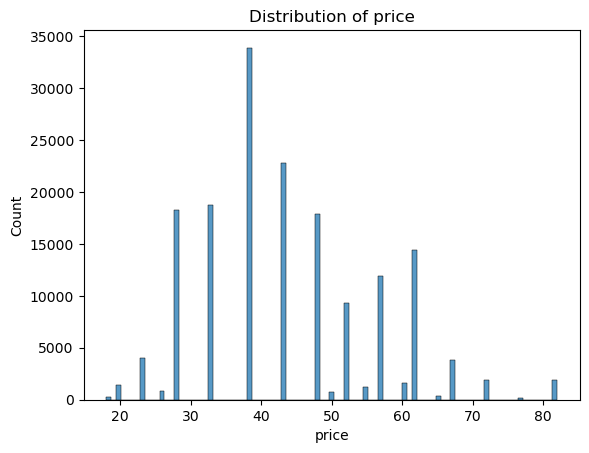

In [14]:
# Histogram for price
sns.histplot(x='price', data=df_eshop)
plt.title('Distribution of price')
plt.show()

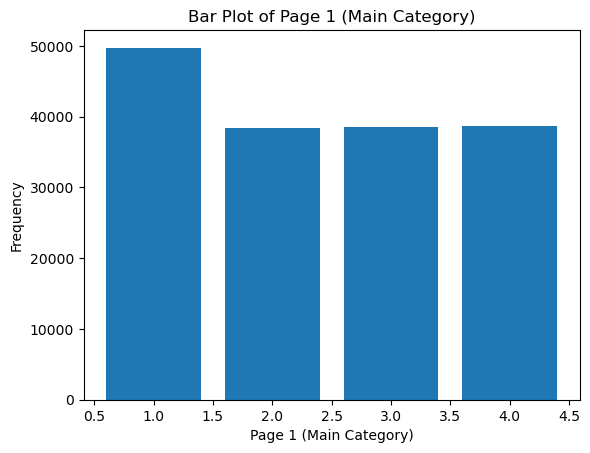

In [15]:
import matplotlib.pyplot as plt
plt.bar(df_eshop['page 1 (main category)'].value_counts().index, df_eshop['page 1 (main category)'].value_counts())
plt.xlabel('Page 1 (Main Category)')
plt.ylabel('Frequency')
plt.title('Bar Plot of Page 1 (Main Category)')
plt.show()

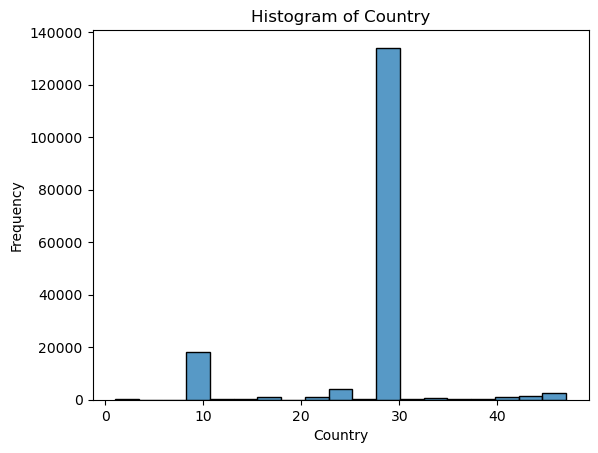

In [16]:
import seaborn as sns
sns.histplot(df_eshop['country'])
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.title('Histogram of Country')
plt.show()

In [17]:
trousers = df_eshop[df_eshop['page 1 (main category)'] == 1]
max_price_row = trousers.loc[trousers['price'].idxmax()]
print("Colour of the trouser with the highest price: ", max_price_row['colour'])

Colour of the trouser with the highest price:  3


Hence,Colour of the trouser with the highest price is Blue

Text(0, 0.5, 'Count')

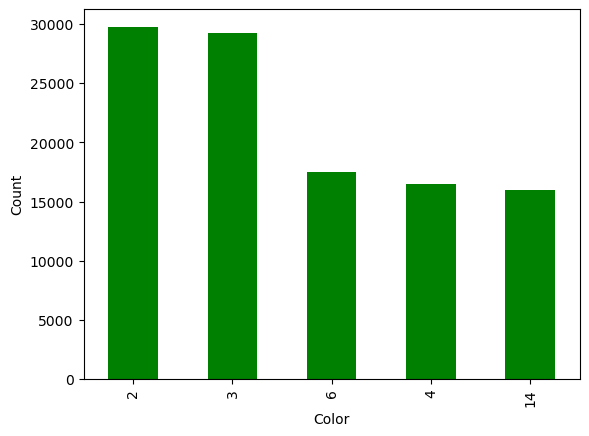

In [18]:
df_eshop['colour'].value_counts()[:5].plot(kind='bar', color = 'green')
plt.xlabel('Color')
plt.ylabel('Count')

Black was the most common color amongst all products followed by blue. 

In [19]:
# calculate the correlation matrix
corr_matrix = df_eshop[['price', 'order']].corr()

# print the correlation matrix
print(corr_matrix)


          price     order
price  1.000000 -0.064779
order -0.064779  1.000000


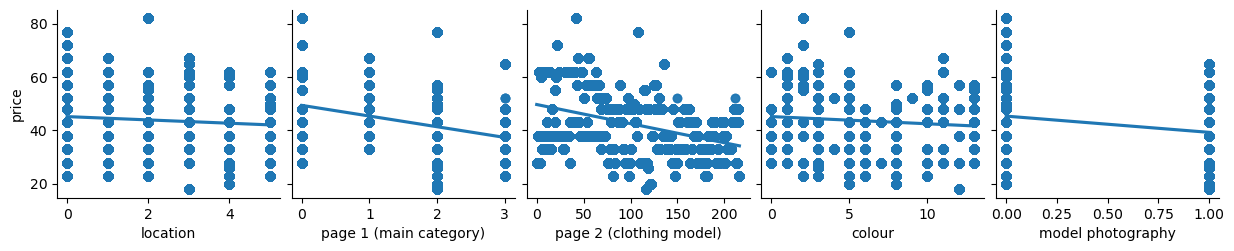

In [20]:
# Select relevant columns
cols = ['location', 'page 1 (main category)', 'page 2 (clothing model)', 'colour', 'model photography', 'price']
df_eshop = df_eshop[cols]

# Encode categorical variables
df_eshop['location'] = df_eshop['location'].astype('category').cat.codes
df_eshop['page 1 (main category)'] = df_eshop['page 1 (main category)'].astype('category').cat.codes
df_eshop['page 2 (clothing model)'] = df_eshop['page 2 (clothing model)'].astype('category').cat.codes
df_eshop['colour'] = df_eshop['colour'].astype('category').cat.codes
df_eshop['model photography'] = df_eshop['model photography'].astype('category').cat.codes

# Plot pairplot
sns.pairplot(df_eshop, x_vars=['location', 'page 1 (main category)', 'page 2 (clothing model)', 'colour', 'model photography'], y_vars='price', kind='reg')


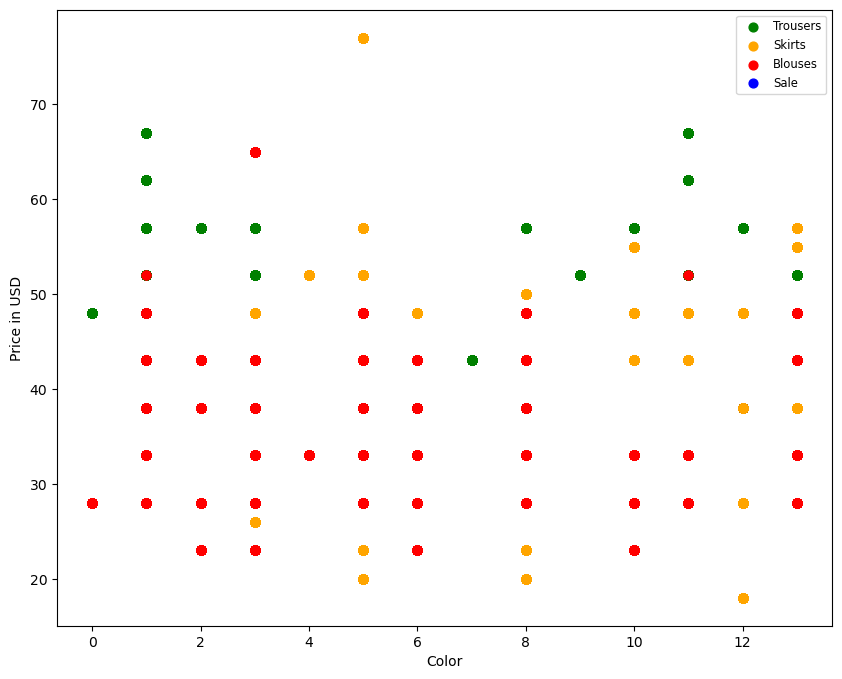

In [21]:
skirts = df_eshop[df_eshop['page 1 (main category)'] == 2]
blouses = df_eshop[df_eshop['page 1 (main category)'] == 3]
sale = df_eshop[df_eshop['page 1 (main category)'] == 4]
trousers = df_eshop[df_eshop['page 1 (main category)'] == 1]

# scatter plot 
plt.figure(figsize=(10, 8))
plt.scatter(trousers['colour'], trousers['price'], color='green', s=40, label='Trousers')
plt.scatter(skirts['colour'], skirts['price'], color='orange', s=40, label='Skirts')
plt.scatter(blouses['colour'], blouses['price'], color='red', s=40, label='Blouses')
plt.scatter(sale['colour'], sale['price'], color='blue', s=40, label='Sale')
plt.ylabel('Price in USD')
plt.xlabel('Color')
plt.legend(loc='upper right', fontsize='small')

# Poland 

,country,sessionid_order,country_name
0,29,133963,Poland
1,9,18003,Czech Republic
2,24,4091,Lithuania


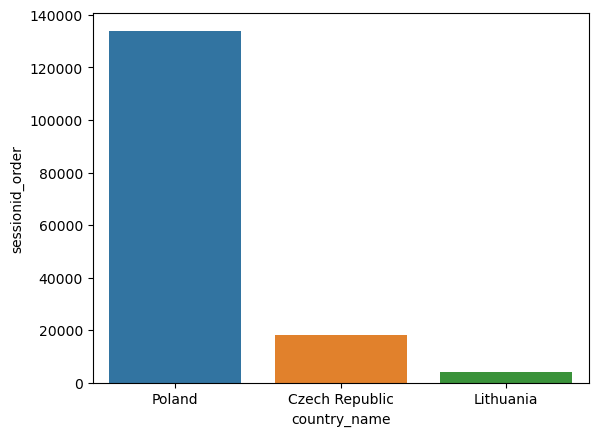

In [27]:
top_countries = df_eshop.groupby('country')['sessionid_order'].count().sort_values(ascending=False).reset_index()[0:3]

def country_map(country_code):
    if country_code==29:
        return 'Poland'
    elif country_code==9:
        return 'Czech Republic'
    else:
        return 'Lithuania'

top_countries['country_name']=top_countries['country'].apply(country_map)

sns.barplot(x=top_countries['country_name'],y=top_countries['sessionid_order'])
top_countries

In [144]:
clickstream_poland = df_eshop[df_eshop['country']==29]
clickstream_poland.head()

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page,page1_encoded,sessionid_order,max_clicks_per_session
0,2008,4,1,1,29,1,1,0.0,1,5,1,28,2,1,0.0,1_1,9
1,2008,4,1,2,29,1,1,1.0,1,6,1,33,2,1,0.0,1_2,9
2,2008,4,1,3,29,1,2,2.0,10,2,1,52,1,1,1.0,1_3,9
3,2008,4,1,4,29,1,2,3.0,6,6,2,38,2,1,1.0,1_4,9
4,2008,4,1,5,29,1,2,4.0,4,3,2,52,1,1,1.0,1_5,9


In [145]:
clickstream_poland.groupby('colour')['sessionid_order'].count().sort_values()

colour
5      1288
8      2117
10     2940
11     4288
13     4933
7      5802
1      5959
12     7067
9     11259
14    13200
4     13857
6     14203
3     22457
2     24593
Name: sessionid_order, dtype: int64

<AxesSubplot:xlabel='price 2', ylabel='Count'>

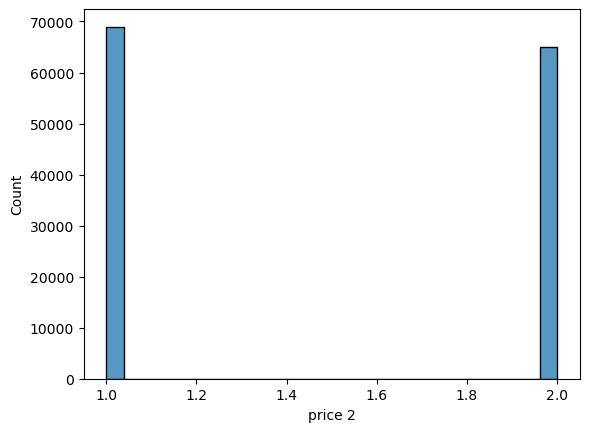

In [146]:
sns.histplot(clickstream_poland['price 2'])

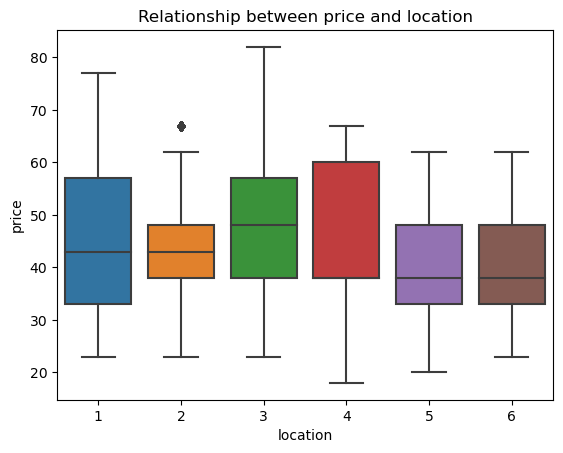

In [211]:
# Scatter plot for price vs location
sns.boxplot(x='location',y='price', data=clickstream_poland)
plt.title('Relationship between price and location')
plt.show()

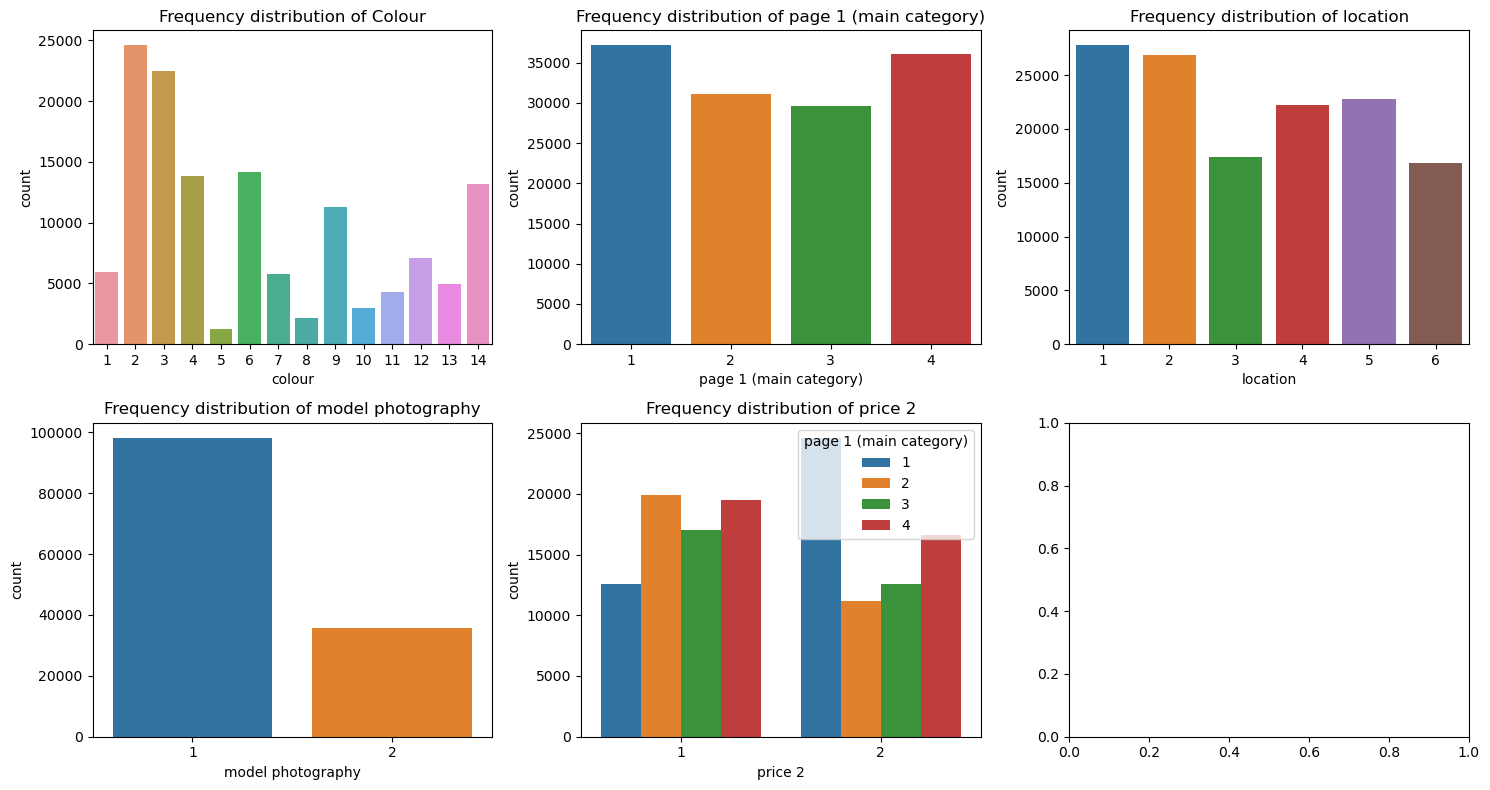

In [147]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

# Bar chart for Colour
sns.countplot(x='colour', data=clickstream_poland, ax=axes[0, 0])
axes[0, 0].set_title('Frequency distribution of Colour')

# Bar chart for page 1 (main category)
sns.countplot(x='page 1 (main category)', data=clickstream_poland, ax=axes[0, 1])
axes[0, 1].set_title('Frequency distribution of page 1 (main category)')

# Bar chart for location
sns.countplot(x='location', data=clickstream_poland, ax=axes[0, 2])
axes[0, 2].set_title('Frequency distribution of location')

# Bar chart for model photography
sns.countplot(x='model photography', data=clickstream_poland, ax=axes[1, 0])
axes[1, 0].set_title('Frequency distribution of model photography')

# Bar chart for price 2
sns.countplot(x='price 2', data=clickstream_poland, ax=axes[1, 1],hue='page 1 (main category)')
axes[1, 1].set_title('Frequency distribution of price 2')

plt.tight_layout()
plt.show()

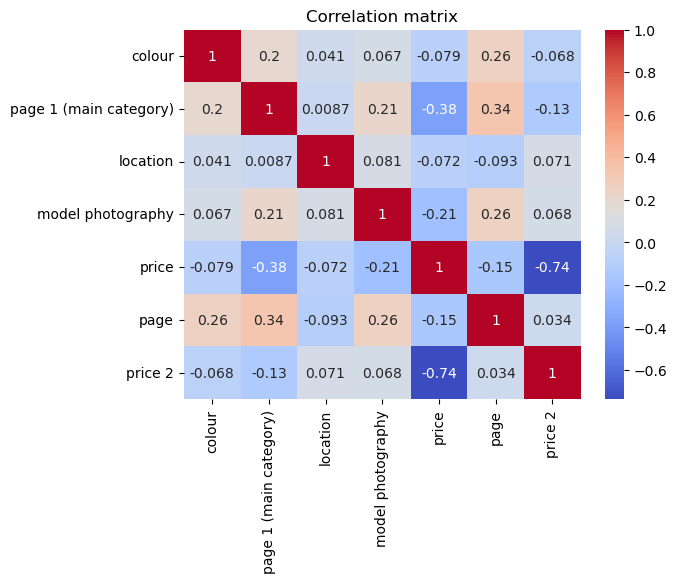

In [148]:
# Compute correlation matrix
corr = clickstream_poland[['colour', 'page 1 (main category)', 'location', 'model photography', 'price', 'page', 'price 2']].corr()

# Plot heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

# Chi-square and ANOVA test 

In [121]:
import pandas as pd
from scipy.stats import chi2_contingency

#null hypothesis : there is no association between colour and country
#alternate hypothesis : there is a significant association between colour and country
# Select the columns of interest from the DataFrame
df_eshop_subset = df_eshop[['colour', 'country']]

# Create a contingency table of the two variables
contingency_table = pd.crosstab(df_eshop_subset['colour'], df_eshop_subset['country'])

# Perform the chi-square test of independence
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2)
print("P-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected values:", expected)

Chi-square statistic: 2546.0895395958396
P-value: 8.907785951498435e-238
Degrees of freedom: 598
Expected values: [[1.41139998e-01 2.72870662e+00 1.20439465e+01 4.70466659e-02
  1.88186664e-01 2.35233330e-01 4.23419993e-01 4.70466659e-02
  8.46981127e+02 7.15109322e+00 5.41036658e+00 9.87979985e+00
  9.40933319e-02 2.02300664e+00 5.88083324e+00 3.92369194e+01
  1.08207332e+00 8.46839987e-01 1.36435331e+00 4.70466659e-01
  3.81548461e+01 6.77471990e+00 2.16414663e+00 1.92467910e+02
  3.34031328e+00 9.40933319e-02 1.06795932e+01 6.53948657e+00
  6.30251251e+03 2.35233330e-01 6.77471990e+00 2.30528663e+00
  1.41139998e-01 3.36854128e+01 1.41139998e-01 8.93886653e-01
  7.66860655e+00 6.44539323e+00 1.59958664e+00 4.70466659e-02
  3.21799195e+01 7.99793321e+00 1.45844664e+00 6.51596323e+01
  2.82279996e-01 1.18651692e+02 3.29326662e-01]
 [5.39613474e-01 1.04325272e+01 4.60470164e+01 1.79871158e-01
  7.19484632e-01 8.99355790e-01 1.61884042e+00 1.79871158e-01
  3.23822046e+03 2.73404160e+01 

Since, the p-value is below the significance level(0.05),we reject the null hypothesis and conclude that there is a significant association between the two variables.

In [122]:
import pandas as pd
from scipy.stats import chi2_contingency

#null hypothesis : there is no association between order and price 2
#alternate hypothesis : there is a significant association between order and price 2
# Select the columns of interest from the DataFrame
df_eshop_subset = df_eshop[['order', 'price 2']]

# Create a contingency table of the two variables
contingency_table = pd.crosstab(df_eshop_subset['order'], df_eshop_subset['price 2'])

# Perform the chi-square test of independence
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2)
print("P-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected values:", expected)

Chi-square statistic: 201.99171361021513
P-value: 0.3321385998893971
Degrees of freedom: 194
Expected values: [[1.22972918e+04 1.17287082e+04]
 [9.71663149e+03 9.26736851e+03]
 [8.01734702e+03 7.64665298e+03]
 [6.67634541e+03 6.36765459e+03]
 [5.63374225e+03 5.37325775e+03]
 [4.81634547e+03 4.59365453e+03]
 [4.10080339e+03 3.91119661e+03]
 [3.52908629e+03 3.36591371e+03]
 [3.05103457e+03 2.90996543e+03]
 [2.66767190e+03 2.54432810e+03]
 [2.33600433e+03 2.22799567e+03]
 [2.02532189e+03 1.93167811e+03]
 [1.77708305e+03 1.69491695e+03]
 [1.57746830e+03 1.50453170e+03]
 [1.41265818e+03 1.34734182e+03]
 [1.26473854e+03 1.20626146e+03]
 [1.13217388e+03 1.07982612e+03]
 [1.00421571e+03 9.57784292e+02]
 [9.12597659e+02 8.70402341e+02]
 [8.31216264e+02 7.92783736e+02]
 [7.47787538e+02 7.13212462e+02]
 [6.71524469e+02 6.40475531e+02]
 [6.19829369e+02 5.91170631e+02]
 [5.66086938e+02 5.39913062e+02]
 [5.15415503e+02 4.91584497e+02]
 [4.68326897e+02 4.46673103e+02]
 [4.28403949e+02 4.08596051e+02]

Since, the p-value is more than significance level(0.05),we fail to reject the null hypothesis and conclude that there is no significant association between the two variables.

In [123]:
import pandas as pd
from scipy.stats import chi2_contingency

#null hypothesis : there is no association between country and price
#alternate hypothesis : there is a significant association between country and price
# Select the columns of interest from the DataFrame
df_eshop_subset = df_eshop[['country', 'price']]

# Create a contingency table of the two variables
contingency_table = pd.crosstab(df_eshop_subset['country'], df_eshop_subset['price'])

# Perform the chi-square test of independence
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2)
print("P-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected values:", expected)

Chi-square statistic: 3150.1884370159532
P-value: 8.489706318028964e-254
Degrees of freedom: 874
Expected values: [[5.07632619e-03 2.59799123e-02 7.23739077e-02 1.53014975e-02
  3.31085246e-01 3.39914428e-01 6.14289858e-01 4.12469633e-01
  3.24123427e-01 1.38511186e-02 1.68225824e-01 2.17375539e-02
  2.15453787e-01 2.97508974e-02 2.60759999e-01 7.28815403e-03
  6.90924254e-02 3.50266507e-02 3.33587150e-03 3.48634831e-02]
 [9.81423063e-02 5.02278304e-01 1.39922888e+00 2.95828952e-01
  6.40098142e+00 6.57167893e+00 1.18762706e+01 7.97441290e+00
  6.26638626e+00 2.67788293e-01 3.25236593e+00 4.20259376e-01
  4.16543989e+00 5.75184017e-01 5.04135997e+00 1.40904311e-01
  1.33578689e+00 6.77181914e-01 6.44935156e-02 6.74027340e-01]
 [4.33179835e-01 2.21695251e+00 6.17590679e+00 1.30572779e+00
  2.82526077e+01 2.90060312e+01 5.24194012e+01 3.51974087e+01
  2.76585325e+01 1.18196212e+00 1.43552703e+01 1.85493794e+00
  1.83853898e+01 2.53874325e+00 2.22515199e+01 6.21922477e-01
  5.89588697e+00

Since, the p-value is below the significance level(0.05),we reject the null hypothesis and conclude that there is a significant association between the two variables.

In [124]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Filter the data to only include the columns we need
data = df_eshop[['price', 'country', 'colour']]

# Fit a linear model to the data
model = ols('price ~ C(country) + C(colour) + C(country):C(colour)', data=data).fit()

# Perform an ANOVA test on the model
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)

                            sum_sq        df           F    PR(>F)
C(country)           -7.437561e+05      46.0 -121.782211  1.000000
C(colour)             1.028178e+06      13.0  595.711394  0.000000
C(country):C(colour)  5.650320e+04     598.0    0.711677  0.818452
Residual              2.191127e+07  165036.0         NaN       NaN


The C(country) row represents the main effect of country, which tests whether there is a significant difference in the mean price among the different countries. The p-value is very small (close to 0), which means that there is strong evidence that the mean price varies significantly among the different countries.

The C(colour) row represents the main effect of colour, which tests whether there is a significant difference in the mean price among the different colours. The p-value is also very small (close to 0), which means that there is strong evidence that the mean price varies significantly among the different colours.

The C(country):C(colour) row represents the interaction effect between country and colour. It tests whether the effect of country on price depends on colour, or vice versa. The p-value is relatively large (0.818452), which means that there is no strong evidence of an interaction effect between country and col

# Linear Regression 

# Model 1 

In [36]:
pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [41]:
# ordinal encode the categorical feature
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce

oe = ce.OrdinalEncoder(cols=["page 2 (clothing model)"])
df_eshop = oe.fit_transform(df_eshop)

In [73]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import warnings
warnings.filterwarnings('ignore')


# set the predictor variables
X = df_eshop.drop(['price'], axis=1)
y = df_eshop['price']

# create a linear regression model
model1 = LinearRegression()

# use RFE to select the top 7 features
rfe = RFE(model1, n_features_to_select=7)
rfe.fit(X, y)

# print the selected features
selected_features = [f for f, s in zip(X.columns, rfe.support_) if s]
print(selected_features)

# print the ranking of the top 7 features
print("Top 7 Feature Ranking:")
ranked_features = list(zip(rfe.ranking_, selected_features))
top_7 = sorted(ranked_features)[:7]
for rank, feature in top_7:
    print(f"Rank {rank}: {feature}")

['month', 'page 1 (main category)', 'colour', 'model photography', 'price 2', 'page', 'page1_encoded']
Top 7 Feature Ranking:
Rank 1: page 1 (main category)
Rank 1: page1_encoded
Rank 3: price 2
Rank 5: model photography
Rank 7: colour
Rank 8: page
Rank 10: month


In [74]:
from sklearn.model_selection import train_test_split
Reg_df=df_eshop[['month','page 1 (main category)','colour','location','model photography','price 2','page','price']]

#Splitting the train and test data 
# Select the price column as the feature to be predicted (y)
y = Reg_df['price']

# Remove the price column to create the training data
X = Reg_df.drop('price', axis=1)

# Perform a 75% train and 25% test data split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.25,random_state=1)

print("{} rows in test set vs. {} in training set. {} Features.".format(X_test1.shape[0], X_train1.shape[0], X_test1.shape[1]))

41369 rows in test set vs. 124105 in training set. 7 Features.


In [75]:
#Multicollinearity - VIF
#VIF>10, REMOVE. - high VIF indicates high multicollinearity
#VIF>10 indicates heavy multicollinearity so those factors should be removed, <5 is good

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])]
pd.DataFrame({'vif':vif[0:]}, index = X_train1.columns).T

,month,page 1 (main category),colour,location,model photography,price 2,page
vif,10.740257,6.286305,3.390867,4.501463,9.393156,8.118152,5.058746


In [76]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(X_train1,y_train1)

#Printing the intercept of the model
print("The intercept of the model is",regression.intercept_)

#Printing the regression coefficient
print("The coeficient of the model is",regression.coef_)

The intercept of the model is 88.23888639907531
The coeficient of the model is [  0.06661721  -5.20497129  -0.17470404  -0.02819778  -1.89416039
 -20.3383448    0.8933829 ]


In [78]:
#Linear Regression Model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train1, y_train1)

# Predict
y_pred1 = regressor.predict(X_test1)

#Accuracy
from sklearn.metrics import r2_score
r2_test = r2_score(y_test1, y_pred1)  

from sklearn.metrics import mean_squared_error
from math import sqrt
mse_test1 = sqrt(mean_squared_error(y_test1, y_pred1))

#Printing the r2 error and mean square error of the test value
print("The r2 error of the test model is",r2_test)
print("The mean square error of the test model is",mse_test1)

The r2 error of the test model is 0.783849757989275
The mean square error of the test model is 5.831469377314053


In [79]:
#Getting the Y_pred and r2 train error and mean square error of the train data
y_predt1 = regressor.predict(X_train1)
r2_train1 = r2_score(y_train1, y_predt1) 
mse_train1 = sqrt(mean_squared_error(y_train1, y_predt1))
print("The r2 error of the train model is",r2_train1)
print("The mean square error of the train model is",mse_train1)

The r2 error of the train model is 0.7849722983739216
The mean square error of the train model is 5.819478471270866


In [80]:
#find the residuals for the y_test
residual = y_test1 - y_pred1
residual

93218     -3.086089
160245     1.777785
133045    10.391197
102124    -7.927272
8425       1.328467
            ...    
79788     -4.208528
11164      9.375307
75749     -2.738809
81390      1.811267
25464     -2.659059
Name: price, Length: 41369, dtype: float64

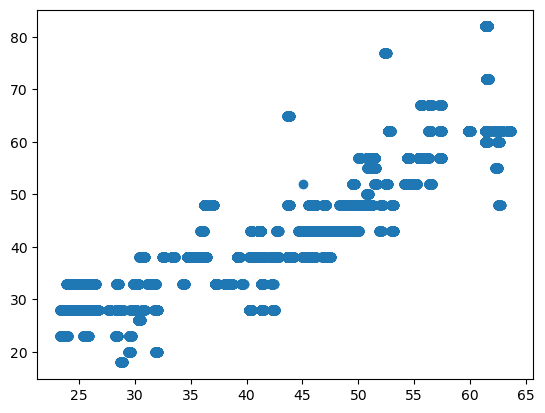

In [81]:
#linearity , exploring the linearity for the y_test results
#plot predicted vs actual
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(y_pred1,y_test1)

<AxesSubplot:xlabel='price', ylabel='Density'>

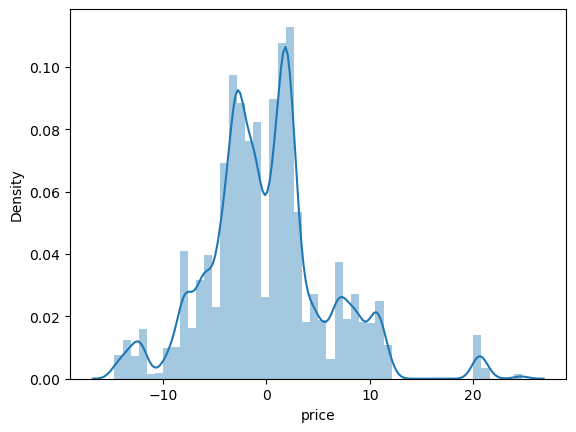

In [82]:
#Normality of Residual
#1 Distribution
#2 PP plot or a QQ plot. 
%matplotlib inline
import seaborn as sns
sns.distplot(residual)

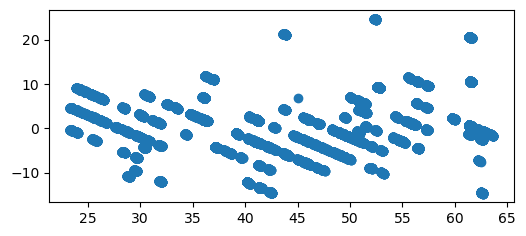

In [83]:
#homoskedasticity., there shouldnt be a pattern as such, increasing or decreasing or anything like that 

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6,2.5))
ax.scatter(y_pred1, residual)

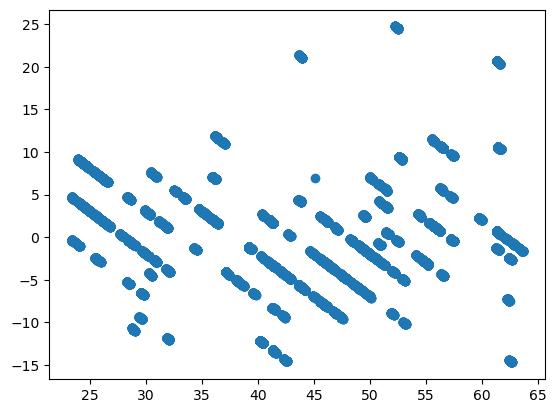

In [84]:
#residuals vs predicted plot
# look for independence assumption. If the residuals are distributed uniformly randomly around the zero x-axes and 
#do not form specific clusters, then the assumption holds true.
plt.scatter(y_pred1, residual)

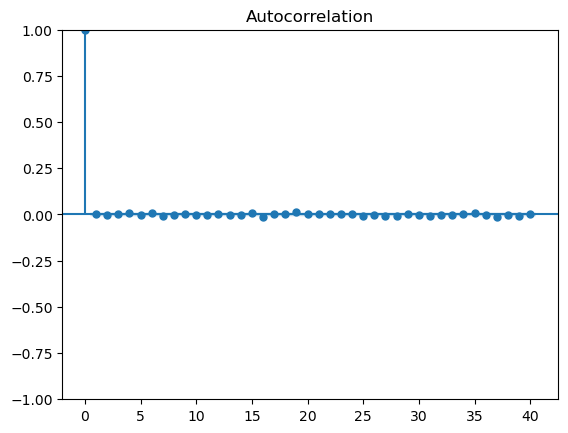

In [85]:
#autocorrelation
#except the first line, all other lines should be inside the blue or the significance area
#outside the blue area would mean there is some significant autocorrelation

import statsmodels.api as sm
import statsmodels.tsa.api as smt

acf = smt.graphics.plot_acf(residual, lags=40 , alpha=0.05)
acf.show()

In [86]:
from sklearn.metrics import mean_squared_error
# predict on the training data
y_pred_train1 = regressor.predict(X_train1)

# calculate the RMSE
rmse_train1 = np.sqrt(mean_squared_error(y_train1, y_pred_train1))

print(f"RMSE on training set: {rmse_train1}")

RMSE on training set: 5.819478471270866


In [87]:
# predict on the test data
y_pred_test1 = regressor.predict(X_test1)

# calculate the RMSE
rmse_test1 = np.sqrt(mean_squared_error(y_test1, y_pred_test1))

print(f"RMSE on test set: {rmse_test1}")

# calculate the difference between training and test RMSE
rmse_diff1 = rmse_train1 - rmse_test1
print(f"Difference in RMSE between training and test sets: {rmse_diff1}")

# determine if the model is overfit by comparing training and test RMSE
if rmse_diff1 > 0:
    print("Model is overfit")
else:
    print("Model is not overfit")

RMSE on test set: 5.831469377314053
Difference in RMSE between training and test sets: -0.011990906043187088
Model is not overfit


In [88]:
# Evaluate the model performance
score = regressor.score(X_test1, y_test1)

print("Accuracy:", score)

Accuracy: 0.783849757989275


# Model 2 

In [103]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
encoder = OrdinalEncoder(categories=[['1', '2', '3', '4']])
df_eshop['page1_encoded'] = encoder.fit_transform(df_eshop[['page 1 (main category)']])
df_eshop.head()

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page,page1_encoded
0,2008,4,1,1,29,1,1,A13,1,5,1,28,2,1,0.0
1,2008,4,1,2,29,1,1,A16,1,6,1,33,2,1,0.0
2,2008,4,1,3,29,1,2,B4,10,2,1,52,1,1,1.0
3,2008,4,1,4,29,1,2,B17,6,6,2,38,2,1,1.0
4,2008,4,1,5,29,1,2,B8,4,3,2,52,1,1,1.0


In [104]:
# Lets fit the multiple linear regression model

#define predictor variables
X = df_eshop[['location','country','month','price']] 
#define response variable
y = df_eshop['page1_encoded'] 

lr_model2 = LinearRegression().fit(X, y)

# Evaluate the model
print("Model intercept:", lr_model2.intercept_)
print("Model coefficients:", lr_model2.coef_)
print("R-squared score:", lr_model2.score(X, y))

Model intercept: 2.3046301594709497
Model coefficients: [-0.00889032  0.01846787  0.0123608  -0.03291193]
R-squared score: 0.14700666661903405


In [105]:
# Lets fit the multiple linear regression model

#define predictor variables
X = df_eshop[['location','country','month','price']] 
#define response variable
y = df_eshop['page1_encoded'] 

X = sm.add_constant(X)
ols_model2 = sm.OLS(y, X)
results = ols_model2.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          page1_encoded   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     7129.
Date:                Tue, 16 May 2023   Prob (F-statistic):               0.00
Time:                        12:54:40   Log-Likelihood:            -2.4396e+05
No. Observations:              165474   AIC:                         4.879e+05
Df Residuals:                  165469   BIC:                         4.880e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3046      0.018    126.310      0.0

In [106]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the Lasso regression model
lasso = Lasso(alpha=0.1)

# Fit the model on the training data
lasso.fit(X_train2, y_train2)

# Predict the response variable for the testing data
y_pred = lasso.predict(X_test2)

# Get the R-squared score of the Lasso model on the testing data
lasso_score = lasso.score(X_test2, y_test2)

# Get the coefficients of the Lasso model
lasso_coef = lasso.coef_

print("Lasso coefficients:", lasso_coef)
print("Lasso R-squared score:", lasso_score)

Lasso coefficients: [ 0.         -0.          0.01713205  0.         -0.03219581]
Lasso R-squared score: 0.14633311679917926


In [107]:
from sklearn.metrics import mean_squared_error

# Predict on training set
y_pred_train2 = lasso.predict(X_train2)

# Calculate RMSE on training set
rmse_train2 = np.sqrt(mean_squared_error(y_train2, y_pred_train2))

print("RMSE on training set:", rmse_train2)

RMSE on training set: 1.057912586030812


In [108]:
# Use the trained Lasso model to make predictions on the test set
y_pred2 = lasso.predict(X_test2)

# Calculate the RMSE
rmse2 = np.sqrt(np.mean((y_test2 - y_pred2) ** 2))

print("RMSE on test set:", rmse2)

RMSE on test set: 1.0558056909493312


# Model 3 

In [109]:
import pandas as pd
from sklearn.linear_model import LinearRegression


# Preprocess the data
X = df_eshop[['country', 'session ID', 'colour', 'price', 'page']]
y = df_eshop['page 1 (main category)']

# Train the model
model3 = LinearRegression().fit(X, y)


# Evaluate the model
print("Model intercept:", model3.intercept_)
print("Model coefficients:", model3.coef_)
print("R-squared score:", model3.score(X, y))

Model intercept: 2.3799653309937088
Model coefficients: [ 1.75670835e-02  1.74402207e-06  3.66939745e-02 -2.80665693e-02
  3.08295628e-01]
R-squared score: 0.2504222152268598


In [110]:
# Preprocess the data
X = df_eshop[['country', 'session ID', 'colour', 'price', 'page']]
y = df_eshop['page 1 (main category)']

X = sm.add_constant(X)
ols_model3 = sm.OLS(y, X)
results = ols_model3.fit()
print(results.summary())

                              OLS Regression Results                              
Dep. Variable:     page 1 (main category)   R-squared:                       0.250
Model:                                OLS   Adj. R-squared:                  0.250
Method:                     Least Squares   F-statistic:                 1.106e+04
Date:                    Tue, 16 May 2023   Prob (F-statistic):               0.00
Time:                            12:54:49   Log-Likelihood:            -2.3327e+05
No. Observations:                  165474   AIC:                         4.666e+05
Df Residuals:                      165468   BIC:                         4.666e+05
Df Model:                               5                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

In [111]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the Lasso regression model
lasso = Lasso(alpha=0.1)

# Fit the model on the training data
lasso.fit(X_train3, y_train3)

# Predict the response variable for the testing data
y_pred = lasso.predict(X_test3)

# Get the R-squared score of the Lasso model on the testing data
lasso_score = lasso.score(X_test3, y_test3)

# Get the coefficients of the Lasso model
lasso_coef = lasso.coef_

print("Lasso coefficients:", lasso_coef)
print("Lasso R-squared score:", lasso_score)

Lasso coefficients: [ 0.00000000e+00  1.62574864e-02  2.28736785e-06  3.67962274e-02
 -2.86940031e-02  2.06043440e-01]
Lasso R-squared score: 0.24086980546707792


In [112]:
from sklearn.metrics import mean_squared_error

# Predict on training set
y_pred_train3 = lasso.predict(X_train3)

# Calculate RMSE on training set
rmse_train3 = np.sqrt(mean_squared_error(y_train3, y_pred_train3))

print("RMSE on training set:", rmse_train3)

RMSE on training set: 0.9959547112017936


In [113]:
# Use the trained Lasso model to make predictions on the test set
y_pred3 = lasso.predict(X_test3)

# Calculate the RMSE
rmse3 = np.sqrt(np.mean((y_test3 - y_pred3) ** 2))

print("RMSE on test set:", rmse3)

RMSE on test set: 0.9956298634296403


# Model 4 

In [115]:
# ordinal encode the categorical feature
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce

oe = ce.OrdinalEncoder(cols=["page 2 (clothing model)"])
df_eshop = oe.fit_transform(df_eshop)

In [116]:
import pandas as pd
from sklearn.linear_model import LinearRegression


# Preprocess the data
X = df_eshop[['page 2 (clothing model)','colour', 'model photography','price', 'page1_encoded']]
y = df_eshop['page']

# Train the model
model4 = LinearRegression().fit(X, y)

# Evaluate the model
print("Model intercept:", model4.intercept_)
print("Model coefficients:", model4.coef_)
print("R-squared score:", model4.score(X, y))

Model intercept: 0.40737553095305046
Model coefficients: [0.00222867 0.04440248 0.40827311 0.00104677 0.2006449 ]
R-squared score: 0.1991725324445579


In [117]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Preprocess the data
X = df_eshop[['page 2 (clothing model)','colour', 'model photography','price', 'page1_encoded']]
y = df_eshop['page']

# Split data into training and test sets
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
linear_reg = LinearRegression().fit(X_train4, y_train4)

# Train a Ridge regression model
ridge_reg = Ridge(alpha=0.5).fit(X_train4, y_train4)

# Evaluate the models
print("Linear Regression Model intercept:", linear_reg.intercept_)
print("Linear Regression Model coefficients:", linear_reg.coef_)
print("Linear Regression R-squared score:", linear_reg.score(X_test4, y_test4))

print("Ridge Regression Model intercept:", ridge_reg.intercept_)
print("Ridge Regression Model coefficients:", ridge_reg.coef_)
print("Ridge Regression R-squared score:", ridge_reg.score(X_test4, y_test4))

Linear Regression Model intercept: 0.4031334137818794
Linear Regression Model coefficients: [0.0021654  0.04443115 0.41387633 0.00111627 0.20157124]
Linear Regression R-squared score: 0.197679263442194
Ridge Regression Model intercept: 0.4031464450653963
Ridge Regression Model coefficients: [0.00216541 0.04443122 0.41386781 0.00111621 0.20157094]
Ridge Regression R-squared score: 0.19767936272274034


# Logistic regression and Ridge Regression 

# Model 5 

In [166]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve,classification_report

clickstream_poland[['session ID','max_clicks_per_session']].drop_duplicates().groupby(['max_clicks_per_session'])['session ID'].count().sort_values(ascending=True).reset_index()

,max_clicks_per_session,session ID
0,195,1
1,57,1
2,68,1
3,70,1
4,74,1
...,...,...
91,5,1320
92,4,1689
93,3,2177
94,2,2771


In [167]:
# Define the feature names and their corresponding values
feature_mappings = {
    'product_cat_1': 'product_cat_trousers',
    'product_cat_2': 'product_cat_skirts',
    'product_cat_3': 'product_cat_blouses',
    'product_cat_4': 'product_cat_sale',
    'colour_1': 'colour_beige',
    'colour_2': 'colour_black',
    'colour_3': 'colour_blue',
    'colour_4': 'colour_brown',
    'colour_5': 'colour_burgundy',
    'colour_6': 'colour_gray',
    'colour_7': 'colour_green',
    'colour_8': 'colour_navy blue',
    'colour_9': 'colour_of many colors',
    'colour_10': 'colour_olive',
    'colour_11': 'colour_pink',
    'colour_12': 'colour_red',
    'colour_13': 'colour_violet',
    'colour_14': 'colour_white',
    'product_loc_1': 'product_loc_top left',
    'product_loc_2': 'product_loc_top in the middle',
    'product_loc_3': 'product_loc_top right',
    'product_loc_4': 'product_loc_bottom left',
    'product_loc_5': 'product_loc_bottom in the middle',
    'product_loc_6': 'product_loc_bottom right'
}

In [171]:
avg_price_per_category = round(clickstream_poland.groupby('page 1 (main category)')['price'].mean(),2).reset_index()
avg_price_per_category.rename(columns={'price': 'avg_price_per_category'}, inplace=True)
clickstream_poland = clickstream_poland.merge(avg_price_per_category, on='page 1 (main category)', how='left')
#clickstream_poland['avg_price_per_category'] = clickstream_poland['page 1 (main category)'].map(avg_price_per_category)

<AxesSubplot:xlabel='price_diff', ylabel='Count'>

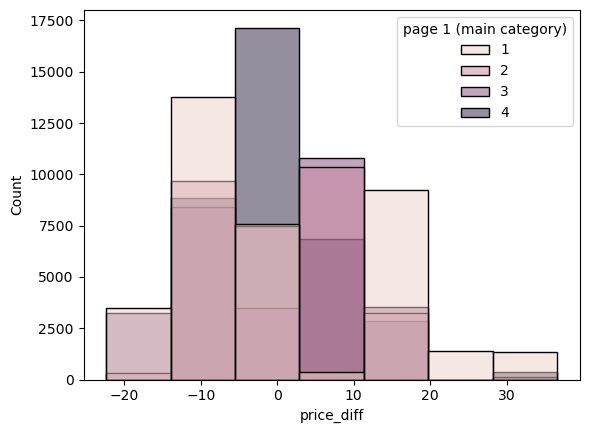

In [214]:
clickstream_poland['price 2']=clickstream_poland['price 2'].replace({1:1,2:0})
clickstream_poland['price_diff']=clickstream_poland['price']-clickstream_poland['avg_price_per_category']
sns.histplot(data=clickstream_poland, x='price_diff', bins=7, hue='page 1 (main category)')

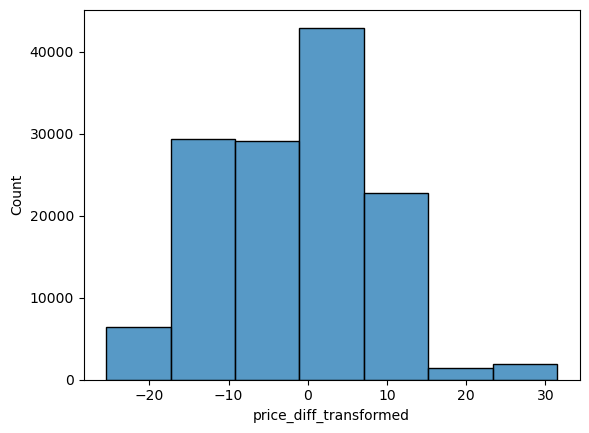

In [213]:
from scipy import stats

# Assuming you have a pandas DataFrame named 'clickstream_poland'
data = clickstream_poland['price_diff']

# Perform Yeo-Johnson transformation
transformed_data, lambda_value = stats.yeojohnson(data)

# Create a new column with the transformed values
clickstream_poland['price_diff_transformed'] = transformed_data
sns.histplot(clickstream_poland['price_diff_transformed'],bins=7)

# Create a relative price difference feature
clickstream_poland['relative_price_diff'] = clickstream_poland['price_diff_transformed'] / clickstream_poland['avg_price_per_category']

<AxesSubplot:xlabel='price_diff_bucket', ylabel='Count'>

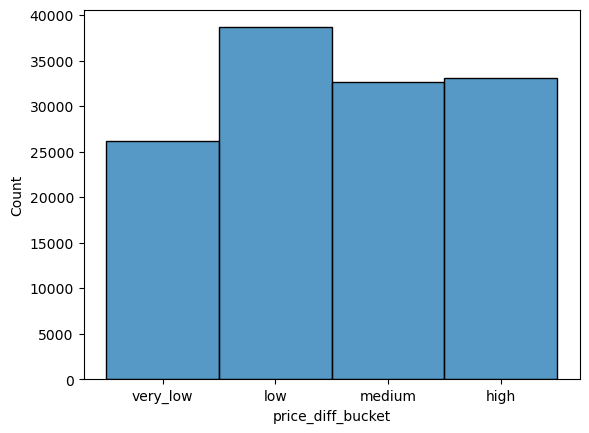

In [212]:
# Define the bucket values
#bucket_values = [
#    -22.38, -10.58, 1.22,
#    13.02, 24.82
#]

bucket_values = [
    -22.38, -8.46, -2.22,
    7.02, 24.82
]

# Define the labels for the buckets
bucket_labels = [
    'very_low', 'low', 'medium', 'high',
]

# Create a new column with the bin labels
clickstream_poland['price_diff_bucket'] = pd.cut(
    clickstream_poland['price_diff'],
    bins=bucket_values,
    labels=bucket_labels,
    right=False  # Set to True if you want the intervals to be right-closed
)
sns.histplot(clickstream_poland['price_diff_bucket'])

In [174]:
colour_dummies = pd.get_dummies(clickstream_poland['colour'], prefix='colour')
page_location_dummies = pd.get_dummies(clickstream_poland['location'],prefix='product_loc')
product_cat_dummies = pd.get_dummies(clickstream_poland['page 1 (main category)'],prefix='product_cat')
price_diff_bucket_dummies = pd.get_dummies(clickstream_poland['price_diff_bucket'], prefix='price_diff')
clickstream_poland_dummies = clickstream_poland.loc[:, ~clickstream_poland.columns.isin(['page 1 (main category)', 'location', 'colour'])]
clickstream_poland_dummies=pd.concat([clickstream_poland_dummies,colour_dummies,page_location_dummies,product_cat_dummies,price_diff_bucket_dummies], axis=1)
clickstream_poland_dummies['model photography']=clickstream_poland_dummies['model photography'].replace({1:1,2:0})
clickstream_poland_dummies.rename(columns={'page': 'page_number'}, inplace=True)
clickstream_poland_dummies.head()

,year,month,day,order,country,session ID,page 2 (clothing model),model photography,price,price 2,...,product_loc_5,product_loc_6,product_cat_1,product_cat_2,product_cat_3,product_cat_4,price_diff_very_low,price_diff_low,price_diff_medium,price_diff_high
0,2008,4,1,1,29,1,0.0,1,28,0,...,1,0,1,0,0,0,1,0,0,0
1,2008,4,1,2,29,1,1.0,1,33,0,...,0,1,1,0,0,0,1,0,0,0
2,2008,4,1,3,29,1,2.0,1,52,1,...,0,0,0,1,0,0,0,0,1,0
3,2008,4,1,4,29,1,3.0,0,38,0,...,0,1,0,1,0,0,1,0,0,0
4,2008,4,1,5,29,1,4.0,0,52,1,...,0,0,0,1,0,0,0,0,1,0


In [175]:
clickstream_poland_X= clickstream_poland_dummies.loc[:, ~clickstream_poland_dummies.columns.isin(['price 2','price_diff_transformed','price_diff','price_diff_bucket','relative_price_diff','price_diff_very_low','price_diff_low','price_diff_medium','price_diff_high','price','colour_10','page_loc_6','product_cat_3','year', 'month', 'day','order','country','session ID','page 2 (clothing model)','sessionid_order','max_clicks_per_session'])]
clickstream_poland_Y=clickstream_poland_dummies['price 2']
clickstream_poland_X.rename(columns=feature_mappings, inplace=True)

X_train5, X_test5, y_train5, y_test5 = train_test_split(clickstream_poland_X, clickstream_poland_Y, test_size=0.3, random_state=42)
X_train5.columns

Index(['model photography', 'page_number', 'page1_encoded',
       'avg_price_per_category_x', 'avg_price_per_category_y',
       'avg_price_per_category_x', 'avg_price_per_category_y',
       'avg_price_per_category', 'colour_beige', 'colour_black', 'colour_blue',
       'colour_brown', 'colour_burgundy', 'colour_gray', 'colour_green',
       'colour_navy blue', 'colour_of many colors', 'colour_pink',
       'colour_red', 'colour_violet', 'colour_white', 'product_loc_top left',
       'product_loc_top in the middle', 'product_loc_top right',
       'product_loc_bottom left', 'product_loc_bottom in the middle',
       'product_loc_bottom right', 'product_cat_trousers',
       'product_cat_skirts', 'product_cat_sale'],
      dtype='object')

In [180]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train5)
X_test_scaled = scaler.transform(X_test5)

# simple logistic regression

model5 = LogisticRegression(random_state=42,max_iter=1000,fit_intercept=True)
model5.fit(X_train_scaled, y_train5)
model5.score(X_test_scaled, y_test5)

0.6840926621712409

In [181]:
bias = model5.intercept_
bias

array([0.04174356])

In [187]:
# L1 Regularization

c_values = [0.01]

model5_l1= LogisticRegression(penalty='l1',solver='saga',random_state=43,max_iter=1000,C=C_values[0])
model5_l1.fit(X_train_scaled,y_train5)
print('L1 regularization score:', model5_l1.score(X_test_scaled, y_test5))

L1 regularization score: 0.6703824429570281


In [190]:
# L2 - Ridge Regularization

from sklearn.model_selection import cross_val_score

C_values = [0.0001]
k = 15  # Number of folds

for C in C_values:
    model5_l2 = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=10000, C=C)
    scores = cross_val_score(model5_l2, X_train_scaled, y_train5, cv=k)
    avg_score = scores.mean()
    print(f'L2 regularization average score: {avg_score}')
    
model5_l2.fit(X_train_scaled,y_train5)
print('L2 regularization score:', model5_l2.score(X_test_scaled, y_test5))


L2 regularization average score: 0.6832384847854927
L2 regularization score: 0.678220408569509


In [191]:
# perform Recursive Feature Elimination (RFE) for backward feature selection for logistic regression
 
from sklearn.feature_selection import RFE

rfe=RFE(estimator=model5_l2,n_features_to_select=8)
rfe.fit(X_train5,y_train5)
#rfe.fit(x1,y1)

# Get the selected features
selected_features_display = rfe.support_

# Print the selected features
print("Selected Features:")
for feature, selected in zip(X_train5.columns, selected_features_display):
    if selected:
        print(feature)


# Get the boolean mask of selected features
selected_features_mask = rfe.support_


# Select the corresponding columns from your feature matrix
selected_features = X_train5.columns[selected_features_mask]


# Update the feature matrix to include only the selected features
X_train_selected = X_train5[selected_features]
X_test_selected = X_test5[selected_features]

print(X_train_selected.columns)

#scaled
X_train_selected_scaled = scaler.fit_transform(X_train_selected)
X_test_selected_scaled = scaler.fit_transform(X_test_selected)


# Train your model using the updated feature matrix
model5_l2.fit(X_train_selected_scaled,y_train5)

print('L2 regularization score:', model5_l2.score(X_test_selected_scaled, y_test5))

#X_train_scaled = scaler.fit_transform(rfe.transform(X_train))
#X_test_scaled = scaler.transform(rfe.transform(X_test))

# L2
#C_values= [.001]

#for C in C_values:
#    model_l2= LogisticRegression(penalty='l2',solver='lbfgs',max_iter=10000,C=C)
#    model_l2.fit(X_train_scaled,y_train)
#    print('L2 regularization score:', model_l2.score(X_test_scaled, y_test))


Selected Features:
model photography
page1_encoded
colour_black
colour_gray
colour_green
colour_red
product_cat_trousers
product_cat_skirts
Index(['model photography', 'page1_encoded', 'colour_black', 'colour_gray',
       'colour_green', 'colour_red', 'product_cat_trousers',
       'product_cat_skirts'],
      dtype='object')
L2 regularization score: 0.6574684615193213


In [192]:
y_pred5 = model5_l2.predict(X_test_selected_scaled)
y_pred_prob = model5_l2.predict_proba(X_test_selected_scaled)[:, 1]
y_pred_train= model5_l2.predict(X_train_selected_scaled)

product_cat_trousers: -0.23907485405371695
colour_green: -0.2212305828245342
colour_red: 0.16732181883240066
colour_gray: -0.14213539141466586
product_cat_skirts: 0.11930588026910018
page1_encoded: 0.11703274108777234
model photography: 0.11298158742546047
colour_black: 0.11059520037910105


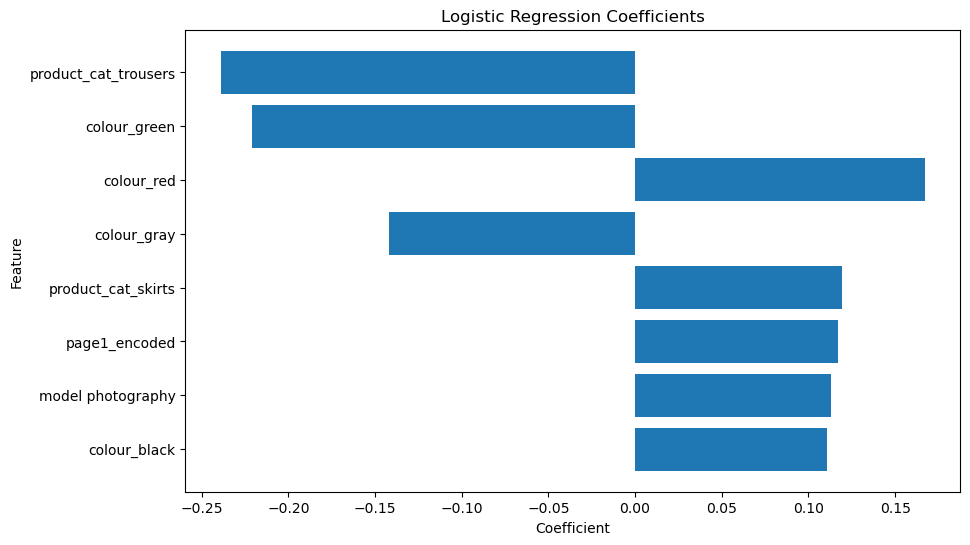

In [193]:
import matplotlib.pyplot as plt

# Obtain the coefficients and feature names
coefs = model5_l2.coef_[0]


# Replace feature names with their corresponding values in X_train
#X_train_selected_copy.rename(columns=feature_mappings, inplace=True)
feature_names = X_train_selected.columns

n = 8  # Number of top features to display

# Sort features by absolute coefficients for plotting
sorted_idx = sorted(range(len(coefs)), key=lambda i: abs(coefs[i]))[-n:]
sorted_features_plot = [feature_names[i] for i in sorted_idx]
sorted_coefs_plot = [coefs[i] for i in sorted_idx]

# Sort features by coefficients for printing
# Combine the coefficients and feature names into a dictionary
coef_dict = dict(zip(feature_names, coefs))

# Print the features with the largest impact on the logistic regression model

top_features = sorted(coef_dict, key=lambda x: abs(coef_dict[x]), reverse=True)[:n]
for feature in top_features:
    print(f"{feature}: {coef_dict[feature]}")

# Plot coefficients
plt.figure(figsize=(10, 6))
plt.barh(sorted_features_plot, sorted_coefs_plot)
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Logistic Regression Coefficients')
plt.show()

In [194]:
# Confusion matrix
cm = confusion_matrix(y_test5, y_pred5)
print("Confusion matrix:")
print(cm)

Confusion matrix:
[[11049  8464]
 [ 5302 15374]]


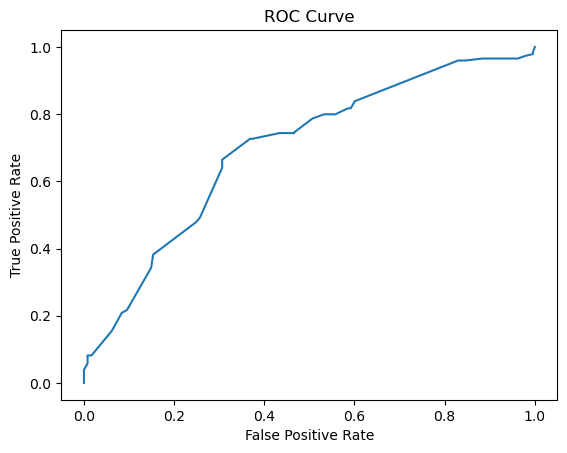

In [195]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test5, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [198]:
# AUC score
auc = roc_auc_score(y_test5, y_pred_prob)
print("AUC score:", auc)

AUC score: 0.6947688784784329


In [199]:
# Classification report
report = classification_report(y_test5, y_pred5)
print("Classification report:")
print(report)

Classification report:
              precision    recall  f1-score   support

           0       0.68      0.57      0.62     19513
           1       0.64      0.74      0.69     20676

    accuracy                           0.66     40189
   macro avg       0.66      0.65      0.65     40189
weighted avg       0.66      0.66      0.65     40189



# rfe

In [202]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rfc = RandomForestClassifier(random_state=44, n_estimators=100, max_depth=8, min_samples_split=8, min_samples_leaf=4)

# Adjust the hyperparameters for regularization
# max_depth: Controls the maximum depth of the trees. Lower values can prevent overfitting.
# min_samples_split: The minimum number of samples required to split an internal node. Higher values can prevent overfitting.
# min_samples_leaf: The minimum number of samples required to be at a leaf node. Higher values can prevent overfitting.

accuracies = cross_val_score(rfc, X_train_scaled, y_train5, cv=5)
rfc.fit(X_train_scaled, y_train5)
y_pred6 = rfc.predict(X_test_scaled)
y_pred_prob = rfc.predict_proba(X_test_scaled)[:, 1]
 
# Obtain accuracy
print("Train Score:", np.mean(accuracies))
print("Test Score:", rfc.score(X_test_scaled, y_test5))


Train Score: 0.8699001325642728
Test Score: 0.8766826743636318


In [203]:
# Confusion matrix
cm = confusion_matrix(y_test5, y_pred6)
print("Confusion matrix:")
print(cm)

Confusion matrix:
[[15743  3770]
 [ 1186 19490]]


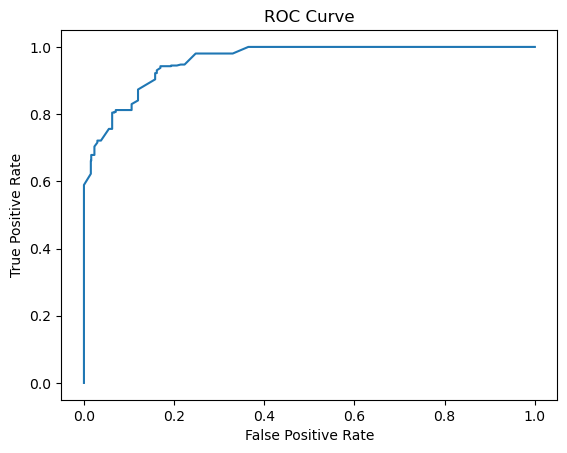

In [204]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test5, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [205]:
# AUC score
auc = roc_auc_score(y_test5, y_pred_prob)
print("AUC score:", auc)

AUC score: 0.9595516417729738


page_number: 0.14349365465914896
colour_gray: 0.09224453326649128
product_loc_top in the middle: 0.07033822553186682
product_cat_trousers: 0.05123191136132524
colour_green: 0.050799039595902415
page1_encoded: 0.04923681073022213
model photography: 0.04774195084016592
product_loc_top left: 0.044935731195551366
colour_beige: 0.03769482845292558
product_loc_top right: 0.03703428150025858
colour_black: 0.035601698893307665
colour_red: 0.033782843751354506


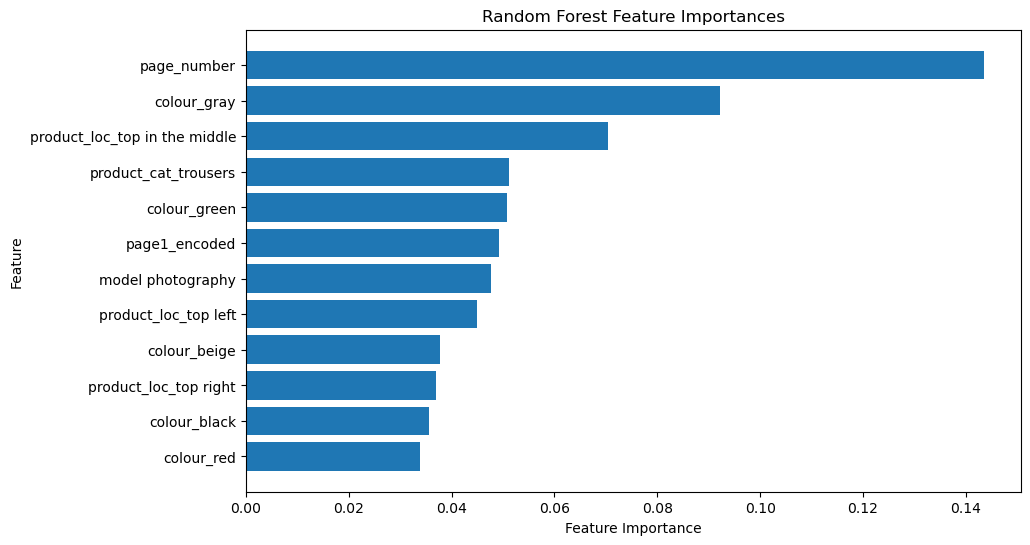

In [206]:
import matplotlib.pyplot as plt

# Obtain feature importances
importances = rfc.feature_importances_
feature_names = X_train.columns

n = 12  # Number of top features to display

# Sort features by importances for plotting
sorted_idx = np.argsort(importances)[-n:]
sorted_features_plot = [feature_names[i] for i in sorted_idx]
sorted_importances_plot = importances[sorted_idx]

# Sort features by importances for printing
# Combine the importances and feature names into a dictionary
importance_dict = dict(zip(feature_names, importances))

# Print the features with the largest importance in the Random Forest model
top_features = sorted(importance_dict, key=lambda x: importance_dict[x], reverse=True)[:n]
for feature in top_features:
    print(f"{feature}: {importance_dict[feature]}")

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(sorted_features_plot, sorted_importances_plot)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importances')
plt.show()

In [207]:
# perform Recursive Feature Elimination (RFE) for backward feature selection

from sklearn.feature_selection import RFE

rfe=RFE(estimator=rfc,n_features_to_select=12)
rfe.fit(X_train5,y_train5)
#rfe.fit(x1,y1)

# Get the selected features
selected_features_display = rfe.support_

# Print the selected features
print("Selected Features:")
for feature, selected in zip(X_train5.columns, selected_features_display):
    if selected:
        print(feature)


# Get the boolean mask of selected features
selected_features_mask = rfe.support_


# Select the corresponding columns from your feature matrix
selected_features = X_train5.columns[selected_features_mask]


# Update the feature matrix to include only the selected features
X_train_selected = X_train5[selected_features]
X_test_selected = X_test5[selected_features]

#scaled
X_train_selected_scaled = scaler.fit_transform(X_train_selected)
X_test_selected_scaled = scaler.fit_transform(X_test_selected)

# Train your model using the updated feature matrix
rfc.fit(X_train_selected_scaled,y_train5)

print('Random Forest classifier train score:', rfc.score(X_train_selected_scaled, y_train5))
print('Random Forest classifier test score:', rfc.score(X_test_selected_scaled, y_test5))


Selected Features:
model photography
page_number
page1_encoded
avg_price_per_category_y
colour_beige
colour_gray
colour_green
product_loc_top left
product_loc_top in the middle
product_loc_top right
product_loc_bottom left
product_cat_trousers
Random Forest classifier train score: 0.8426002943246529
Random Forest classifier test score: 0.8401055015053871


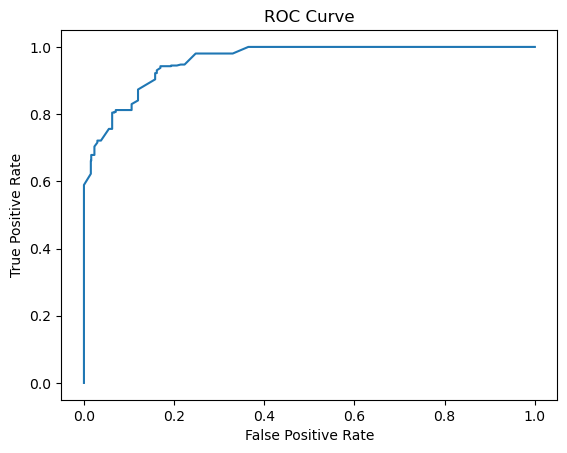

In [208]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test5, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [209]:
# AUC score
auc = roc_auc_score(y_test5, y_pred_prob)
print("AUC score:", auc)

AUC score: 0.9595516417729738


In [210]:
# Classification report
report = classification_report(y_test5, y_pred6)
print("Classification report:")
print(report)

Classification report:
              precision    recall  f1-score   support

           0       0.93      0.81      0.86     19513
           1       0.84      0.94      0.89     20676

    accuracy                           0.88     40189
   macro avg       0.88      0.87      0.88     40189
weighted avg       0.88      0.88      0.88     40189

